<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/Multi_output_keras_functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==2.3.0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 48 kB/s 
     |████████████████████████████████| 459 kB 61.9 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 26.1 MB 1.5 MB/s 
     |████████████████████████████████| 2.9 MB 51.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
  

In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_metrics 
from sklearn.metrics import confusion_matrix
import itertools
 

In [4]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'


In [5]:
white_df = pd.read_csv(URL,sep=';')

In [6]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
white_df['is_red']= 0 

In [8]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
white_df = white_df.drop_duplicates(keep='first')

In [10]:
white_df.alcohol[0]

8.8

In [11]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'


In [12]:

red_df = pd.read_csv(URL, sep=";")


red_df["is_red"] = 1

red_df = red_df.drop_duplicates(keep='first')

In [13]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [14]:
df = pd.concat([red_df,white_df],ignore_index=True)

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
print(df.is_red==1)

0        True
1        True
2        True
3        True
4        True
        ...  
5315    False
5316    False
5317    False
5318    False
5319    False
Name: is_red, Length: 5320, dtype: bool


In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_red'],
      dtype='object')

In [18]:
import seaborn as sns 

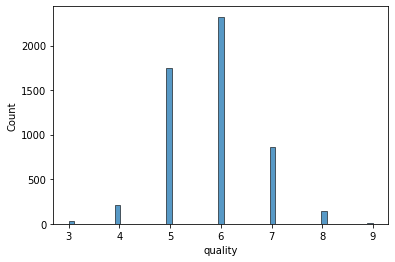

In [19]:
sns.histplot(df.quality)

In [20]:
df = df[(df.quality>4 )& (df.quality<8)]

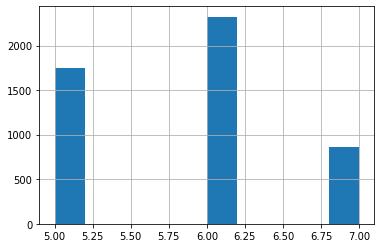

In [21]:
df.quality.hist()

In [22]:
train,test = train_test_split(df,test_size=.2,random_state=1)

In [23]:
train,val = train_test_split(train,test_size=.2,random_state=1)

In [24]:
train_state = train.describe()

In [25]:
train_state

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000
mean,7.221616,0.338929,0.321569,5.155911,0.056976,30.388590,115.062282,0.994633,3.223201,0.534051,10.504466,5.813629,0.255784
std,1.325297,0.162476,0.147970,4.639632,0.036802,17.236784,56.706617,0.003005,0.161272,0.149149,1.154654,0.701121,0.436370
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.500000,5.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,75.000000,0.992320,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,2.800000,0.047000,28.000000,117.000000,0.994810,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.400000,7.650000,0.066000,41.000000,156.000000,0.996800,3.330000,0.600000,11.300000,6.000000,1.000000
max,15.600000,1.240000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.950000,14.000000,7.000000,1.000000


In [26]:
train_state.pop('is_red')

count    3155.000000
mean        0.255784
std         0.436370
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_red, dtype: float64

In [27]:
train_state.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,400.505864,394.717676,394.761192,405.430693,394.483472,427.578172,503.096112,395.125957,396.845559,394.924150,402.532390,398.814344
std,1112.991232,1115.322544,1115.305020,1111.207859,1115.417136,1102.761264,1076.214024,1115.157570,1114.463277,1115.239199,1112.171002,1113.668792
min,1.325297,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.003005,0.161272,0.149149,1.154654,0.701121
25%,5.750000,0.213119,0.224492,2.550000,0.037701,17.177588,70.426654,0.991017,3.012500,0.377500,9.250000,5.000000
50%,7.110808,0.314464,0.315784,4.897772,0.051988,29.194295,116.031141,0.994721,3.216601,0.522025,10.402233,5.906815
75%,9.675000,0.610000,0.715000,22.187500,0.202250,63.500000,203.000000,1.007345,3.500000,0.937500,11.975000,6.250000
max,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000


In [28]:
train_state.pop('quality')

count    3155.000000
mean        5.813629
std         0.701121
min         5.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: quality, dtype: float64

In [29]:
train_state.transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [30]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [31]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [32]:
train_Y = format_output(train)

In [33]:
train_Y

(array([5, 6, 5, ..., 6, 5, 5]), array([1, 0, 0, ..., 1, 1, 0]))

In [34]:
val_Y = format_output(val)
test_Y = format_output(test)

In [35]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
241,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3856,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
4147,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1856,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1300,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


In [36]:
train_state = train_state.transpose()

In [37]:
def norm(x):
  return (x - train_state['mean']) / train_state['std']

In [44]:
norm_train_X = norm(train)
norm_val_X = norm(val)
norm_test_X = norm(test)

In [45]:
def base_model(inputs):
  x = tf.keras.layers.Dense(128,activation=tf.nn.relu)(inputs)
  x = tf.keras.layers.Dense(128,activation=tf.nn.relu)(x)

  return x

In [46]:
def final_model(inputs):
  x = base_model(inputs)
  wine_quality = Dense(units=1, name = 'wine_quality')(x)

  wine_type = Dense(units=1, activation='sigmoid', name = 'wine_type')(x)


  model = Model(inputs = inputs,outputs=[wine_quality,wine_type])


  return model

In [47]:
len(train.columns)

11

In [48]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

In [50]:
model.compile(optimizer=rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mean_squared_error'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                       }
             )

In [51]:
history = model.fit(norm_train_X, train_Y,
                    epochs = 180, validation_data=(norm_val_X, val_Y))

Epoch 1/180
99/99 [==============================] - 0s 4ms/step - loss: 26.5249 - wine_quality_loss: 25.8386 - wine_type_loss: 0.6863 - wine_quality_root_mean_squared_error: 5.0832 - wine_type_accuracy: 0.5886 - val_loss: 18.8280 - val_wine_quality_loss: 18.1737 - val_wine_type_loss: 0.6543 - val_wine_quality_root_mean_squared_error: 4.2631 - val_wine_type_accuracy: 0.7072
Epoch 2/180
99/99 [==============================] - 0s 2ms/step - loss: 12.5154 - wine_quality_loss: 11.8889 - wine_type_loss: 0.6266 - wine_quality_root_mean_squared_error: 3.4480 - wine_type_accuracy: 0.7823 - val_loss: 7.2009 - val_wine_quality_loss: 6.6049 - val_wine_type_loss: 0.5959 - val_wine_quality_root_mean_squared_error: 2.5700 - val_wine_type_accuracy: 0.7997
Epoch 3/180
99/99 [==============================] - 0s 2ms/step - loss: 4.5929 - wine_quality_loss: 4.0407 - wine_type_loss: 0.5522 - wine_quality_root_mean_squared_error: 2.0102 - wine_type_accuracy: 0.8146 - val_loss: 3.0570 - val_wine_quality_l

In [52]:
prediction = model.predict(norm_train_X)

In [53]:
quality_pred = prediction[0]
type_pred = prediction[1]

In [ ]:
# print(quality_pred[5318])

In [60]:
df.quality[5318]

7

In [59]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
5315    6
5316    5
5317    6
5318    7
5319    6
Name: quality, Length: 4931, dtype: int64

In [64]:
def plot_metrics(metrics_name , title, ylim):
  plt.title(title)
  plt.ylim(ylim)
  plt.plot(history.history[metrics_name], color='red', label = metrics_name)
  plt.plot(history.history['val_' + metrics_name],color='green',label='val_' + metrics_name)

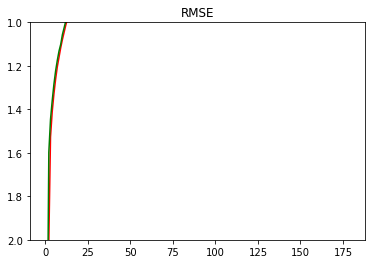

In [65]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

In [66]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

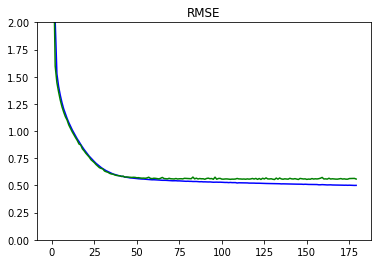

In [67]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

In [68]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [69]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

ValueError: ignored